<a href="https://colab.research.google.com/github/mmcgovern574/Hugging-Face-Models/blob/main/HF_Music_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

gtzan = load_dataset("marsyas/gtzan", "all")
gtzan

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for marsyas/gtzan contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/marsyas/gtzan
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 999
    })
})

In [ ]:
gtzan["train"][0]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/blues/blues.00000.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/blues/blues.00000.wav',
  'array': array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
         -0.06106567, -0.06417847]),
  'sampling_rate': 22050},
 'genre': 0}

In [ ]:
"""
from datasets import Dataset, DatasetDict

def split_audio(sample):
    max_length_sec = 15.0  # Define max_length
    sampling_rate = sample["audio"]["sampling_rate"]
    max_length_samples = int(max_length_sec * sampling_rate)

    audio_array = sample["audio"]["array"]
    first_segment = audio_array[:max_length_samples]
    second_segment = audio_array[max_length_samples:2 * max_length_samples]

    return [
        {"file": sample["file"], "audio": {"path": sample["audio"]["path"], "array": first_segment, "sampling_rate": sampling_rate}, "genre": sample["genre"]},
        {"file": sample["file"], "audio": {"path": sample["audio"]["path"], "array": second_segment, "sampling_rate": sampling_rate}, "genre": sample["genre"]}
    ]

# Load the dataset
gtzan = load_dataset("marsyas/gtzan", "all")

# Manually create a new dataset
new_data = {'file': [], 'audio': [], 'genre': []}
for sample in gtzan['train']:
    segments = split_audio(sample)
    for segment in segments:
        for key in new_data:
            new_data[key].append(segment[key])

# Convert the list of dictionaries to a new Dataset
split_dataset = Dataset.from_dict(new_data)

# Organize into a DatasetDict
gtzan_split = DatasetDict({'train': split_dataset})

# gtzan_split now contains the split dataset

"""

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for marsyas/gtzan contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/marsyas/gtzan
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# gtzan_split

In [ ]:
# gtzan_split["train"][0]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/blues/blues.00000.wav',
 'audio': {'array': [0.00732421875,
   0.0166015625,
   0.00762939453125,
   -0.003509521484375,
   -0.00225830078125,
   -0.009368896484375,
   -0.022674560546875,
   -0.022369384765625,
   -0.031280517578125,
   -0.043304443359375,
   -0.03192138671875,
   -0.023223876953125,
   -0.023468017578125,
   -0.0164794921875,
   -0.00958251953125,
   -0.015380859375,
   -0.018524169921875,
   -0.015533447265625,
   -0.032440185546875,
   -0.0438232421875,
   -0.032958984375,
   -0.029205322265625,
   -0.029571533203125,
   -0.0213623046875,
   -0.01202392578125,
   -0.000946044921875,
   0.012786865234375,
   0.01165771484375,
   0.001312255859375,
   -0.001861572265625,
   -0.0067138671875,
   -0.007110595703125,
   -0.010009765625,
   -0.03485107421875,
   -0.045379638671875,
   -0.029571533203125,
   -0.02398681640625,
   -0.01797

In [ ]:
"""
gtzan_split = gtzan_split["train"].train_test_split(seed=42, shuffle=True, test_size=0.1)
gtzan_split
"""

gtzan = gtzan["train"].train_test_split(seed=42, shuffle=True, test_size=0.1)
gtzan

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 899
    })
    test: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 100
    })
})

In [ ]:
# gtzan_split["train"][0]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/metal/metal.00095.wav',
 'audio': {'array': [-0.124420166015625,
   -0.2001953125,
   -0.147308349609375,
   -0.070648193359375,
   -0.119384765625,
   -0.10028076171875,
   0.01544189453125,
   -0.00616455078125,
   -0.0968017578125,
   -0.191741943359375,
   -0.185089111328125,
   -0.08428955078125,
   -0.052825927734375,
   0.00958251953125,
   0.061370849609375,
   0.029205322265625,
   0.001617431640625,
   -0.045562744140625,
   -0.09344482421875,
   -0.163665771484375,
   -0.18939208984375,
   -0.072235107421875,
   0.00872802734375,
   -0.006072998046875,
   -0.07501220703125,
   -0.1763916015625,
   -0.212554931640625,
   -0.229705810546875,
   -0.302886962890625,
   -0.327911376953125,
   -0.197540283203125,
   -0.03680419921875,
   0.020263671875,
   0.009368896484375,
   -0.0672607421875,
   -0.153289794921875,
   -0.1890869140625,
   -0.23

In [ ]:
id2label_fn = gtzan["train"].features["genre"].int2str
id2label_fn(gtzan["train"][0]["genre"])

'pop'

In [ ]:
from transformers import AutoFeatureExtractor

model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(
    model_id, do_normalize=True, return_attention_mask=True
)

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

In [ ]:
sampling_rate = feature_extractor.sampling_rate
sampling_rate

16000

In [ ]:
from datasets import Audio

# gtzan_split = gtzan_split.cast_column("audio", Audio(sampling_rate=sampling_rate))
gtzan = gtzan.cast_column("audio", Audio(sampling_rate=sampling_rate))

In [ ]:
# gtzan_split["train"][18]
gtzan["train"][18]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/reggae/reggae.00066.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/reggae/reggae.00066.wav',
  'array': array([ 0.04847844,  0.04868907,  0.02211966, ..., -0.0397025 ,
         -0.0341662 ,  0.0166193 ]),
  'sampling_rate': 16000},
 'genre': 8}

In [ ]:
import numpy as np

# sample = gtzan_split["train"][0]["audio"]
sample = gtzan["train"][0]["audio"]


print(f"Mean: {np.mean(sample['array']):.3}, Variance: {np.var(sample['array']):.3}")

Mean: 0.000185, Variance: 0.0493


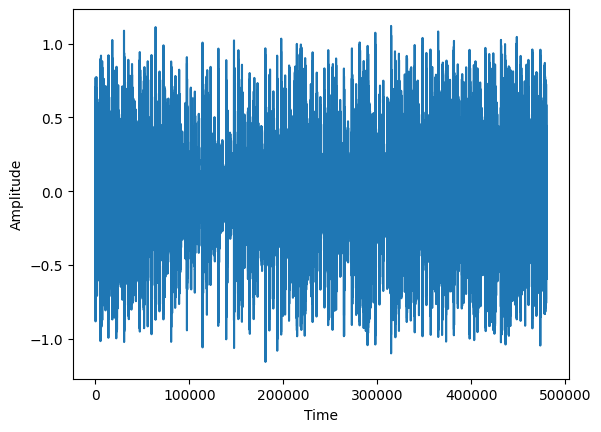

In [ ]:
#plot the waveform of sample in the previous cell

import matplotlib.pyplot as plt

plt.plot(sample["array"])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
inputs = feature_extractor(sample["array"], sampling_rate=sample["sampling_rate"])

print(f"inputs keys: {list(inputs.keys())}")

print(
    f"Mean: {np.mean(inputs['input_values']):.3}, Variance: {np.var(inputs['input_values']):.3}"
)

inputs keys: ['input_values', 'attention_mask']
Mean: -7.45e-09, Variance: 1.0


In [ ]:
max_duration = 30.0


def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
        return_attention_mask=True,
    )
    return inputs

In [ ]:
"""
gtzan_encoded = gtzan_split.map(
    preprocess_function,
    remove_columns=["audio", "file"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
gtzan_encoded
"""

gtzan_encoded = gtzan.map(
    preprocess_function,
    remove_columns=["audio", "file"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
gtzan_encoded

Map:   0%|          | 0/899 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['genre', 'input_values', 'attention_mask'],
        num_rows: 899
    })
    test: Dataset({
        features: ['genre', 'input_values', 'attention_mask'],
        num_rows: 100
    })
})

In [ ]:
gtzan_encoded = gtzan_encoded.rename_column("genre", "label")

In [ ]:
len(gtzan_encoded["train"]["label"])

899

In [ ]:
id2label = {
    str(i): id2label_fn(i)
    for i in range(len(gtzan_encoded["train"].features["label"].names))
}
label2id = {v: k for k, v in id2label.items()}

id2label["7"]

'pop'

In [ ]:
print(gtzan_encoded["train"]["label"][0])

7


In [ ]:
from transformers import AutoModelForAudioClassification

num_labels = len(id2label)

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/94.0M [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'projector.weight', 'classifier.bias', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'classifier.weight', 'projector.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Make sure token has write permission

from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import TrainingArguments

model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5, #was 5e-5
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=True,
)

In [ ]:
!pip install evaluate

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=gtzan_encoded["train"],
    eval_dataset=gtzan_encoded["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.726300,1.633076,0.590000
2,1.116700,1.204605,0.650000
3,0.774000,0.836451,0.800000
4,0.650700,0.701536,0.810000
5,0.504600,0.672240,0.810000
6,0.263200,0.674329,0.820000
7,0.203000,0.735141,0.840000
8,0.090200,0.589810,0.860000
9,0.021500,0.621335,0.870000
10,0.009700,0.694760,0.860000


TrainOutput(global_step=2260, training_loss=0.3294184313027963, metrics={'train_runtime': 9590.3891, 'train_samples_per_second': 1.875, 'train_steps_per_second': 0.236, 'total_flos': 1.2267976549248e+18, 'train_loss': 0.3294184313027963, 'epoch': 20.0})

In [ ]:
kwargs = {
    "dataset_tags": "marsyas/gtzan",
    "dataset": "GTZAN",
    "model_name": f"{model_name}-finetuned-gtzan",
    "finetuned_from": model_id,
    "tasks": "audio-classification",
}

In [ ]:
trainer.push_to_hub(**kwargs)

'https://huggingface.co/mmcgovern574/distilhubert-finetuned-gtzan/tree/main/'